In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

ModuleNotFoundError: No module named 'xgboost'

In [2]:
!pip3 install xgboost

'pip3' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!pip install xgboost

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

In [4]:
taxi = pd.read_csv("yellow_taxi_2019.csv", index_col=[0], parse_dates=[0])
taxi.head()

,Passenger Count,No of Trips,Day of Week
Pickup_Date,,,
2019-01-01,319678,189035,Tuesday
2019-02-01,317395,197852,Wednesday
2019-03-01,350961,222879,Thursday
2019-04-01,373023,235053,Friday
2019-05-01,390129,236041,Saturday


In [5]:
taxi = pd.read_csv("Engg_Data_2019.csv", index_col=[0], parse_dates=[0])
taxi.head()

,Passenger Count,No of Trips,Day of Week,Pickup_Date_Year,Pickup_Date_Month,Pickup_Date_Week,Pickup_Date_Day,Pickup_Date_Dayofweek,Pickup_Date_Dayofyear,Pickup_Date_Is_month_end,Pickup_Date_Is_month_start,Pickup_Date_Is_quarter_end,Pickup_Date_Is_quarter_start,Pickup_Date_Is_year_end,Pickup_Date_Is_year_start,Pickup_Date_Is_Holiday
Pickup_Date,,,,,,,,,,,,,,,,
2019-01-01,319678,189035,Tuesday,2019,1,1,1,1,1,False,True,False,True,False,True,True
2019-01-02,317395,197852,Wednesday,2019,1,1,2,2,2,False,False,False,False,False,False,False
2019-01-03,350961,222879,Thursday,2019,1,1,3,3,3,False,False,False,False,False,False,False
2019-01-04,373023,235053,Friday,2019,1,1,4,4,4,False,False,False,False,False,False,False
2019-01-05,390129,236041,Saturday,2019,1,1,5,5,5,False,False,False,False,False,False,False


In [6]:
ytaxi = taxi[['No of Trips','Pickup_Date_Is_Holiday']]
ytaxi.head()

,No of Trips,Pickup_Date_Is_Holiday
Pickup_Date,,
2019-01-01,189035,True
2019-01-02,197852,False
2019-01-03,222879,False
2019-01-04,235053,False
2019-01-05,236041,False


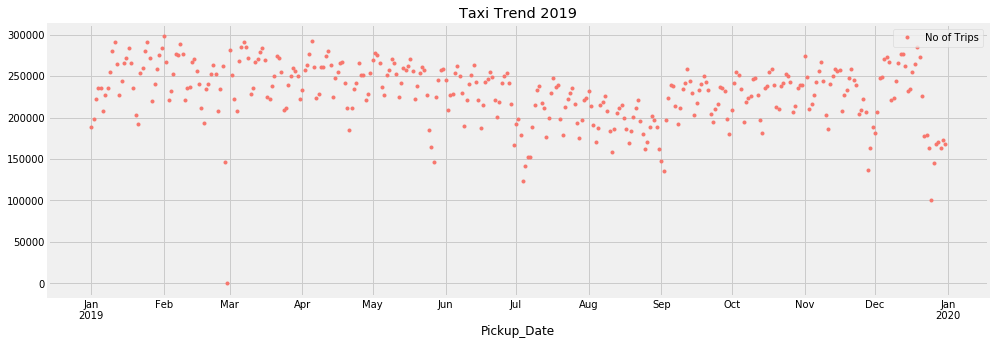

In [7]:
color_pal = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]
_ = ytaxi.plot(style='.', figsize=(15,5), color=color_pal[0], title='Taxi Trend 2019')

In [8]:
split_date = '2019-09-30'
ytaxi_train = ytaxi.loc[ytaxi.index <= split_date].copy()
ytaxi_test = ytaxi.loc[ytaxi.index > split_date].copy()

In [9]:
_ = ytaxi_test \
    .rename(columns={'No of Trips': 'TEST SET'}) \
    .join(ytaxi_train.rename(columns={'No of Trips': 'TRAINING SET'}), how='outer') \
    .plot(figsize=(15,5), title='Taxi Trend 2019', style='.')

ValueError: columns overlap but no suffix specified: Index(['Pickup_Date_Is_Holiday'], dtype='object')

In [10]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [11]:
X_train, y_train = create_features(ytaxi_train, label='No of Trips')
X_test, y_test = create_features(ytaxi_test, label='No of Trips')

In [12]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=True) # Change verbose to False if you don't want to see it train

[0]	validation_0-rmse:165300.35938	validation_1-rmse:169516.12500
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:118023.03906	validation_1-rmse:127321.31250
[2]	validation_0-rmse:84902.91406	validation_1-rmse:98067.39062
[3]	validation_0-rmse:61881.37109	validation_1-rmse:76740.05469
[4]	validation_0-rmse:45811.70312	validation_1-rmse:72478.08594
[5]	validation_0-rmse:34148.53125	validation_1-rmse:61957.27344
[6]	validation_0-rmse:26001.52930	validation_1-rmse:55302.40234
[7]	validation_0-rmse:19984.64648	validation_1-rmse:51061.97266
[8]	validation_0-rmse:15641.87402	validation_1-rmse:47696.72656
[9]	validation_0-rmse:12738.40332	validation_1-rmse:45597.38281
[10]	validation_0-rmse:10638.13281	validation_1-rmse:44171.56641
[11]	validation_0-rmse:8979.36035	validation_1-rmse:42556.58594
[12]	validation_0-rmse:8006.25147	validation_1-rmse:41439.20703
[13]

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=1000, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
       validate_parameters=False, verbosity=None)

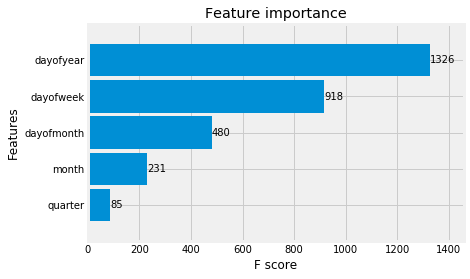

In [13]:
_ = plot_importance(reg, height=0.9)

#Feature importance is a great way to get a general idea about which features the model is relying on most to make the prediction.
#This is a metric that simply sums up how many times each feature is split on.

#We can see that the day of year was most commonly used to split trees, while hour and year came in next.
#Quarter has low importance due to the fact that it could be created by different dayofyear splits.

In [16]:
ytaxi_test['No_of_Trips_Prediction'] = reg.predict(X_test)
ytaxi_all = pd.concat([ytaxi_test, ytaxi_train], sort=False)

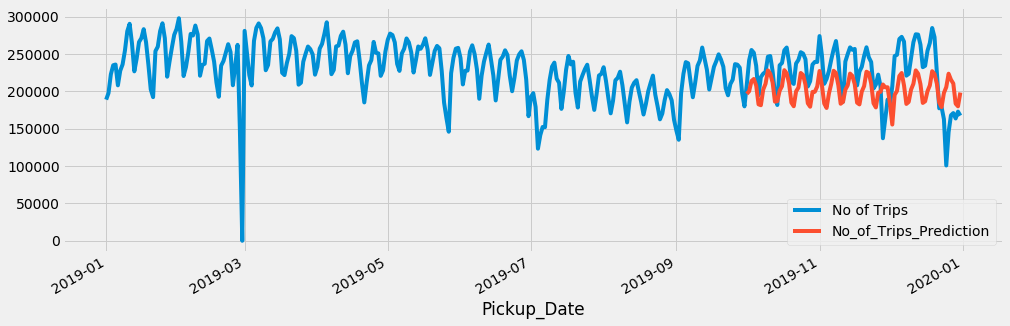

In [17]:
_ = ytaxi_all[['No of Trips','No_of_Trips_Prediction']].plot(figsize=(15, 5))

In [18]:
mean_squared_error(y_true=ytaxi_test['No of Trips'],
                   y_pred=ytaxi_test['No_of_Trips_Prediction'])

1473590495.342102

In [19]:
mean_absolute_error(y_true=ytaxi_test['No of Trips'],
                   y_pred=ytaxi_test['No_of_Trips_Prediction'])

34469.442085597824

In [20]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [21]:
mean_absolute_percentage_error(y_true=ytaxi_test['No of Trips'],
                   y_pred=ytaxi_test['No_of_Trips_Prediction'])

15.852568485438939

In [22]:
#Worst and best predicted days
ytaxi_test['error'] = ytaxi_test['No of Trips'] - ytaxi_test['No_of_Trips_Prediction']
ytaxi_test['abs_error'] = ytaxi_test['error'].apply(np.abs)
error_by_day = ytaxi_test.groupby(['year','month','dayofmonth']) \
    .mean()[['No of Trips','No_of_Trips_Prediction','error','abs_error']]

In [23]:
# Over forecasted days
error_by_day.sort_values('error', ascending=True).head(10)

No of Trips  No_of_Trips_Prediction          error  \
year month dayofmonth                                                       
2019 12    25               100857           205798.218750 -104941.218750   
           26               145557           223753.703125  -78196.703125   
     11    28               137310           209275.671875  -71965.671875   
     12    27               168056           215748.140625  -47692.140625   
     11    29               163495           205562.171875  -42067.171875   
     12    28               171030           210635.859375  -39605.859375   
           24               162856           197972.562500  -35116.562500   
           31               167609           198527.921875  -30918.921875   
           29               163805           183615.609375  -19810.609375   
     11    30               189131           205578.578125  -16447.578125   

                           abs_error  
year month dayofmonth                 
2019 12    25          104941.218750  
           26           78196.703125  
     11    28           71965.671875  
     12    27           47692.140625  
     11    29           42067.171875  
     12    28           39605.859375  
           24           35116.562500  
           31           30918.921875  
           29           19810.609375  
     11    30           16447.578125

In [24]:
# Worst absolute predicted days
error_by_day.sort_values('abs_error', ascending=False).head(10)

No of Trips  No_of_Trips_Prediction          error  \
year month dayofmonth                                                       
2019 12    25               100857           205798.218750 -104941.218750   
           26               145557           223753.703125  -78196.703125   
     11    28               137310           209275.671875  -71965.671875   
     12    7                266752           208008.843750   58743.156250   
           19               284979           227115.250000   57863.750000   
           18               264893           208022.500000   56870.500000   
           11               265927           210297.015625   55629.984375   
           17               254460           200315.218750   54144.781250   
           14               262704           209764.140625   52939.859375   
           13               276184           223788.468750   52395.531250   

                           abs_error  
year month dayofmonth                 
2019 12    25          104941.218750  
           26           78196.703125  
     11    28           71965.671875  
     12    7            58743.156250  
           19           57863.750000  
           18           56870.500000  
           11           55629.984375  
           17           54144.781250  
           14           52939.859375  
           13           52395.531250

In [25]:
# Best predicted days
error_by_day.sort_values('abs_error', ascending=True).head(10)

No of Trips  No_of_Trips_Prediction         error  \
year month dayofmonth                                                      
2019 12    23               179003           179005.078125     -2.078125   
     11    11               186139           186090.734375     48.265625   
     12    1                181825           183858.531250  -2033.531250   
     10    14               181872           186968.390625  -5096.390625   
     12    30               172963           180082.812500  -7119.812500   
     11    27               206758           199555.656250   7202.343750   
     12    22               177376           185012.265625  -7636.265625   
     10    13               196699           186295.984375  10403.015625   
           6                194820           182737.171875  12082.828125   
           1                209235           196781.765625  12453.234375   

                          abs_error  
year month dayofmonth                
2019 12    23              2.078125  
     11    11             48.265625  
     12    1            2033.531250  
     10    14           5096.390625  
     12    30           7119.812500  
     11    27           7202.343750  
     12    22           7636.265625  
     10    13          10403.015625  
           6           12082.828125  
           1           12453.234375

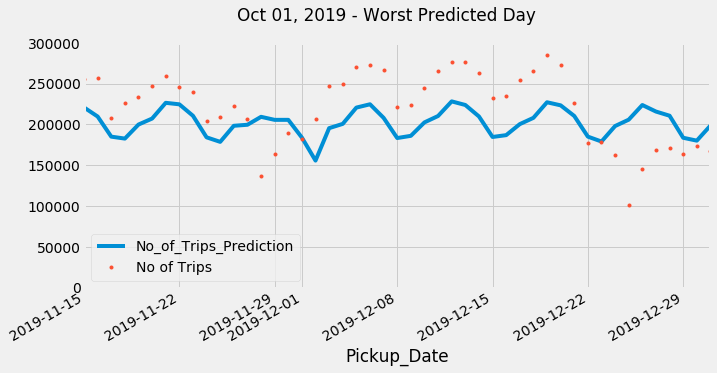

In [30]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = ytaxi_all[['No_of_Trips_Prediction','No of Trips']].plot(ax=ax,
                                              style=['-','.'])
ax.set_ylim(0, 300000)
ax.set_xbound(lower='2019-11-15', upper='2019-12-31')
plot = plt.suptitle('Nov 15, 2019 - Worst Predicted Day')

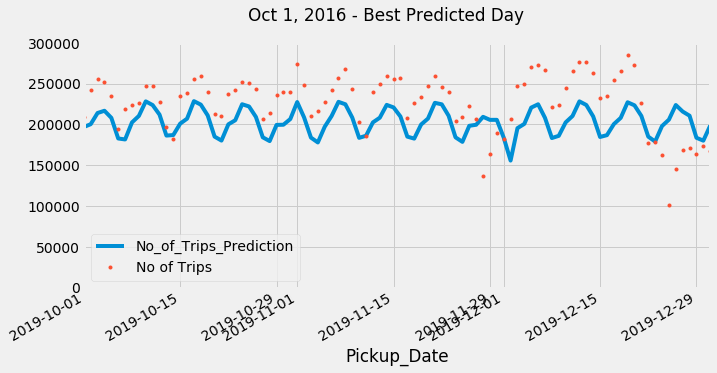

In [32]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
_ = ytaxi_all[['No_of_Trips_Prediction','No of Trips']].plot(ax=ax,
                                              style=['-','.'])
ax.set_ylim(0, 300000)
ax.set_xbound(lower='2019-10-01', upper='2019-12-31')
plot = plt.suptitle('Oct 1, 2016 - Best Predicted Day')

ImportError: You must install graphviz to plot tree

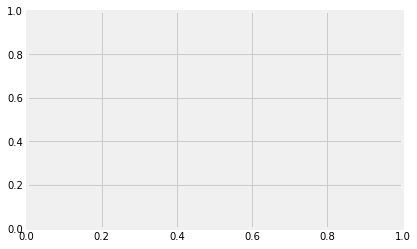

In [14]:
from xgboost import plot_tree
plot_tree(reg)
plt.show()

In [15]:
!pip install graphviz

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

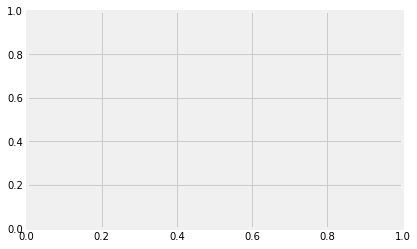

In [16]:
from xgboost import plot_tree
plot_tree(reg)
plt.show()